# Data Analysis on Games available in Steam platform

In [11]:
#Importing the Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

In [12]:
#Importing and reading the CSV file for viewing it's records

df = pd.read_csv("steam.csv")
df.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99


## 1. Find out the number of Games released every year
<br>

In [13]:
#Coverting the release_date column to date datatype and sorting values based on release date

df.release_date = pd.to_datetime(df.release_date)
df = df.sort_values('release_date')


In [14]:
#Finding out the number of games released each year

a = dict(df.release_date.dt.year.value_counts())
a

{2018: 8160,
 2017: 6357,
 2016: 4361,
 2015: 2597,
 2019: 2213,
 2014: 1555,
 2013: 418,
 2012: 320,
 2009: 305,
 2011: 239,
 2010: 238,
 2008: 145,
 2007: 93,
 2006: 48,
 2005: 6,
 2004: 6,
 2001: 4,
 2003: 3,
 2000: 2,
 1999: 2,
 1998: 1,
 2002: 1,
 1997: 1}

In [15]:
#Segregating the Year and sales for easier plotting

year = list(a.keys())
sales = list(a.values())
avg_sales = sum(sales)/len(sales)

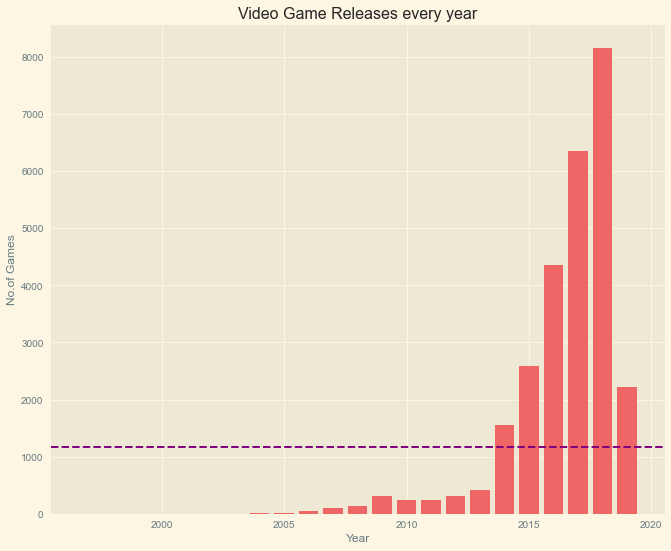

In [16]:
#Plotting a graph to view the same

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(figsize = (11,9))
ax.bar(year, sales, color = '#EE6666')
ax.set(title = "Video Game Releases every year", xlabel = "Year", ylabel = "No.of Games")
ax.axhline(avg_sales, linestyle = '--', color = 'purple');

## 2. Figuring out the Top 10 genres available in the store
<br>

In [17]:
#Removing the whitespace in the genre and replacing it with '-' to join it. (i.e) 'free to play' --> 'free-to-play'

df.genres = df.genres.str.replace('[\ ]', '-')
df.genres.unique()

C:\Users\navee\AppData\Local\Temp/ipykernel_15716/4112919507.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.genres = df.genres.str.replace('[\ ]', '-')


array(['Action;Indie;Racing', 'Action', 'Action;RPG', ...,
       'Utilities;Game-Development;Early-Access',
       'Action;Adventure;Indie;Massively-Multiplayer;Simulation;Strategy',
       'Action;Adventure;Casual;Indie;Simulation;Sports;Early-Access'],
      dtype=object)

In [18]:
#Most games have multiple genres. They are seperated by ';'. We will replace it with whitespace to segreate induvidual genres.

df.genres = df.genres.str.replace('[\;]', ' ')
df.head(2)

C:\Users\navee\AppData\Local\Temp/ipykernel_15716/927784639.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.genres = df.genres.str.replace('[\;]', ' ')


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
2685,282010,Carmageddon Max Pack,1997-06-30,1,Stainless Games Ltd,THQ Nordic,windows,0,Single-player;Multi-player;Steam Trading Cards,Action Indie Racing,Racing;Action;Classic,0,352,35,13,13,50000-100000,5.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19


In [19]:
#Filtering and picking out the top 10 Genres

genres = dict(Counter(" ".join(df["genres"]).split()).most_common(100))
genres = dict(Counter(genres).most_common(10))
genres

{'Indie': 19421,
 'Action': 11903,
 'Casual': 10210,
 'Adventure': 10032,
 'Strategy': 5247,
 'Simulation': 5194,
 'RPG': 4311,
 'Early-Access': 2954,
 'Free-to-Play': 1704,
 'Sports': 1322}

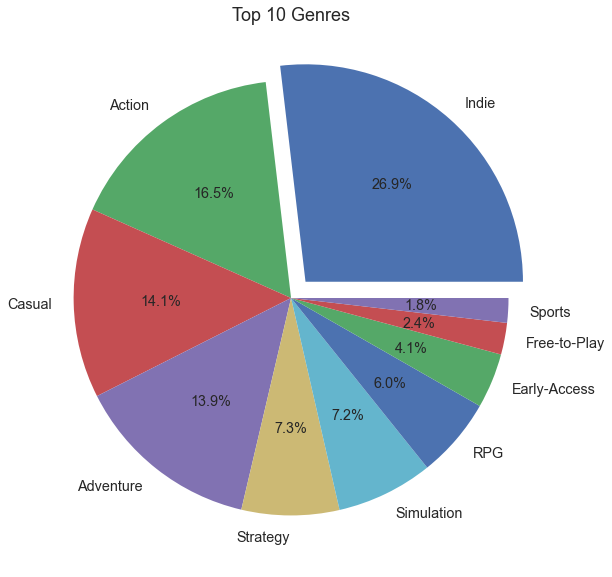

In [20]:
#Plotting a Pie-chart to view the same

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (10,10))
ax.pie(genres.values(), labels = genres.keys(), 
       textprops={'size': 'x-large'}, explode=(0.1, 0, 0, 0,0,0,0,0,0,0),
       autopct='%.1f%%')
ax.set_title("Top 10 Genres", fontsize=18);

## 3. Finding out the ratio of positive and negative feedbacks for the top publishers

In [21]:
#Calculating the total positive and negative reviews for the top publishers

pub = df[['publisher', 'positive_ratings', 'negative_ratings']]
pub = pub.groupby('publisher').sum()
pub = pub.sort_values('positive_ratings', ascending = False).head(10)
pub = pub.reset_index()
pub

,publisher,positive_ratings,negative_ratings
0,Valve,5270672,640136
1,Ubisoft,900522,250488
2,Bethesda Softworks,826954,146022
3,PUBG Corporation,496184,487076
4,Rockstar Games,464184,175082
5,Paradox Interactive,344624,58733
6,2K;Aspyr (Mac);Aspyr (Linux),339216,48211
7,Starbreeze Publishing AB,309653,57362
8,Square Enix,299959,79575
9,Smartly Dressed Games,292574,31482


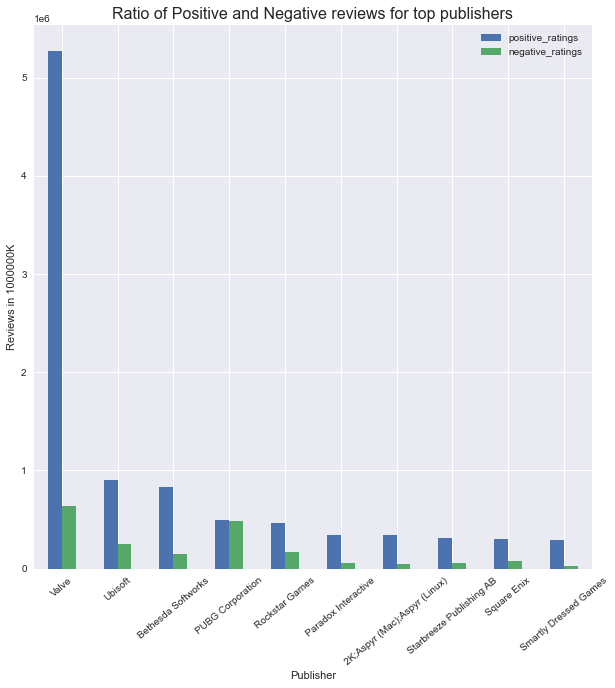

In [22]:
#Plotting a graph to find the ratio

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (10,10))
pub.plot.bar(x = 'publisher', y = ['positive_ratings', 'negative_ratings'], rot = 40, ax = ax)
ax.set_title("Ratio of Positive and Negative reviews for top publishers", fontsize = 16)
ax.set(xlabel = "Publisher", ylabel = "Reviews in 1000000K");